In [20]:
def mds(data, n_components=2):
    """
    Apply multidimensional scaling (aka Principal Coordinates Analysis)
    :param data: nxn square distance matrix
    :param n_components: number of components for projection
    :return: projected output of shape (n_components, n)
    """

    # Center distance matrix
    center(data)
    
    # Make a list of (eigenvalue, eigenvector) tuples
    eig_val_cov, eig_vec_cov = np.linalg.eig(data)
    eig_pairs = [
        (np.abs(eig_val_cov[i]), eig_vec_cov[:, i]) for i in range(len(eig_val_cov))]
    ### Then, we choose the two principal components by selecting the eigenvectors with the two largest eigenvalues and we obtain the subspace 
    #transform matrix W of shape 784 x 2 that will be used for the projection.
      # Select n_components eigenvectors with largest eigenvalues, obtain subspace transform matrix
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    eig_pairs = np.array(eig_pairs)
    matrix_w = np.hstack(
        [eig_pairs[i, 1].reshape(data.shape[1], 1) for i in range(n_components)] )

    # Return samples in new subspace
    return matrix_w

## Load our face data

In [31]:
import math
import pandas as pd
import scipy.io
from sklearn import manifold
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

In [32]:

pd.options.display.max_columns = 7

mat = scipy.io.loadmat('face_data.mat')
df = pd.DataFrame(mat['images']).T

num_images, num_pixels = df.shape
pixels_per_dimension = int(math.sqrt(num_pixels))

# Rotate the pictures
for idx in df.index:
    df.loc[idx] = df.loc[idx].values.reshape(pixels_per_dimension, pixels_per_dimension).T.reshape(-1)
    
# Show first 5 rows
print(df.head())

       0         1         2     ...  4093  4094  4095
0  0.016176  0.000000  0.000000  ...   0.0   0.0   0.0
1  0.016176  0.000000  0.000000  ...   0.0   0.0   0.0
2  0.016176  0.000000  0.000000  ...   0.0   0.0   0.0
3  0.016176  0.110754  0.384988  ...   0.0   0.0   0.0
4  0.016176  0.000000  0.000000  ...   0.0   0.0   0.0

[5 rows x 4096 columns]


### Now we fit our isomap to our data. Remember that if your data is not on the same scale, it may require scaling before this step.

### We will fit a manifold using 8 nearest neighbours and our aim is to reduce down to 2 components.

In [33]:
iso = manifold.Isomap(n_neighbors=8, n_components=2)
iso.fit(df)
manifold_2Da = iso.transform(df)
manifold_2D = pd.DataFrame(manifold_2Da, columns=['Component 1', 'Component 2'])

# Left with 2 dimensions
manifold_2D.head()

,Component 1,Component 2
0,24.353930,-1.179647
1,-28.831611,-8.501346
2,21.924711,4.753321
3,-46.151928,-26.640198
4,40.525332,15.957227


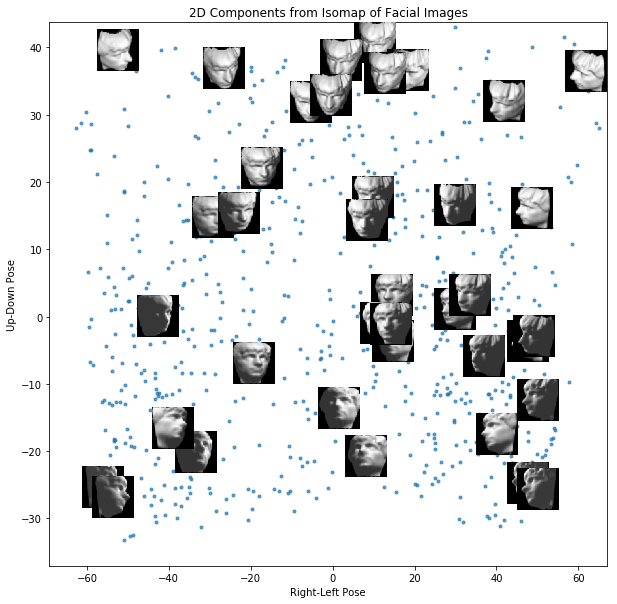

In [30]:
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')
#ax.set_zlabel('Component: 3')

# Show 40 of the images ont the plot
x_size = (max(manifold_3D['Component 1']) - min(manifold_3D['Component 1'])) * 0.08
y_size = (max(manifold_3D['Component 2']) - min(manifold_3D['Component 2'])) * 0.08
#z_size = (max(manifold_3D['Component 3']) - min(manifold_3D['Component 3'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, num_images)
    x0 = manifold_3D.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = manifold_3D.loc[img_num, 'Component 2'] - (y_size / 2.)
   # z0 = manifold_3D.loc[img_num, 'Component 3'] - (z_size / 2.)
    x1 = manifold_3D.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = manifold_3D.loc[img_num, 'Component 2'] + (y_size / 2.)
   # z1 = manifold_3D.loc[img_num, 'Component 3'] + (z_size / 2.)
    img = df.iloc[img_num,:].values.reshape(pixels_per_dimension, pixels_per_dimension)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, 
              interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 3D components plot
ax.scatter(manifold_3D['Component 1'], manifold_3D['Component 2'], marker='.',alpha=0.7)

ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')
#ax.set_zlabel(' Right')

plt.show()

We have reduced the dimensions from 4096 dimensions (pixels) to just 2 dimensions.

These 2 dimensions represent the different points of view of the face, from left to right and from bottom to top.